In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
#data_2013 = pd.read_csv('NIJ2013_JAN01_DEC31.xlsx')
#data_2014 = pd.read_csv ('NIJ2014_JAN01_DEC31.xlsx')
#data_2015 = pd.read_csv('NIJ2015_JAN01_DEC31.xlsx')

with open('NIJ2013_JAN01_DEC31.xlsx', 'rb') as file: content = file.read().decode('utf-8', errors='replace')
with open('NIJ2014_JAN01_DEC31.xlsx', 'rb') as file: content = file.read().decode('utf-8', errors='replace')
with open('NIJ2015_JAN01_DEC31.xlsx', 'rb') as file: content = file.read().decode('utf-8', errors='replace')

In [ ]:
# Replace 'MembershipProduct_q1-2019-2023.xlsx' with the actual path to your Excel file
path1 = 'NIJ2013_JAN01_DEC31.xlsx'
path2 = 'NIJ2014_JAN01_DEC31.xlsx'
path3 = 'NIJ2015_JAN01_DEC31.xlsx'
# Read the Excel file using pandas
df1 = pd.read_excel(path1)
df2 = pd.read_excel(path2)
df3 = pd.read_excel(path3)

In [ ]:
#Concatenating databases vertically
df = pd.concat([df1, df2, df3], ignore_index=True)

In [ ]:
#Using isnull to get total number of null values in @ column
df.isnull().sum()

CATEGORY               0
CALL GROUPS            0
final_case_type        0
CASE DESC              0
occ_date               0
x_coordinate           0
y_coordinate           0
census_tract       35428
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to 'CATEGORY' and 'CALL GROUPS'
df['CATEGORY'] = label_encoder.fit_transform(df['CATEGORY'])
df['CALL GROUPS'] = label_encoder.fit_transform(df['CALL GROUPS'])

In [ ]:
# Finding duplicated rows
df.duplicated().sum()

7890

In [ ]:
# Removing duplicated rows
df.drop_duplicates(inplace = True)

In [ ]:
# Removing some specific columns
columns_to_remove = ['final_case_type', 'CASE DESC']

df.drop(columns=columns_to_remove, inplace = True)

In [ ]:
#Converting occ_date to datetime
df['occ_date'] = pd.to_datetime(df['occ_date'])

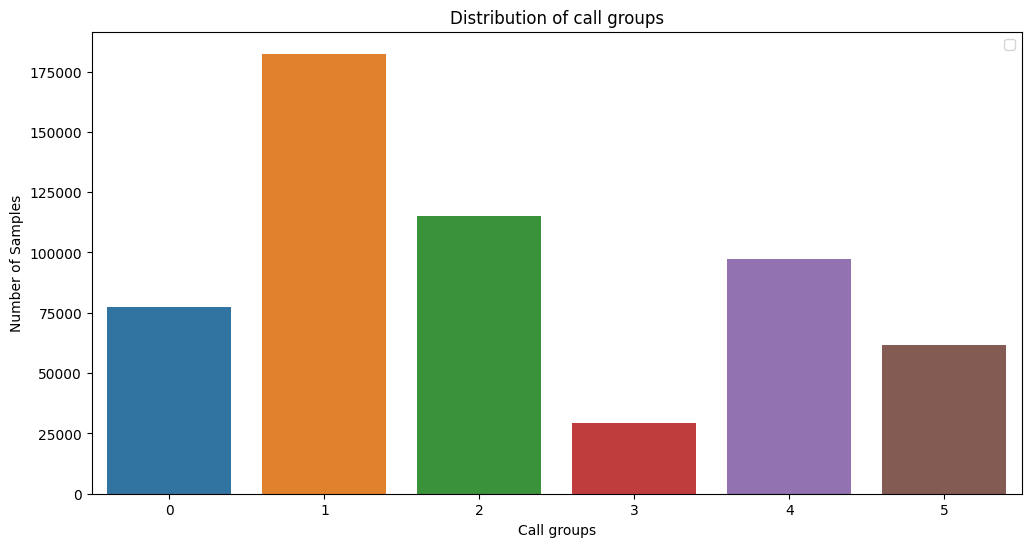

Number of samples: 
 1    182371
2    115163
4     97120
0     77474
5     61780
3     29255
Name: CALL GROUPS, dtype: int64


In [ ]:
import seaborn as sns

# Plotting the crime distribution
plt.figure(figsize = (12, 6))
sns.countplot(x = 'CALL GROUPS', data = df)
plt.title('Distribution of call groups')
plt.xlabel('Call groups')
plt.ylabel('Number of Samples')
plt.legend()
plt.show()

# Counting the number of samples
counts = df['CALL GROUPS'].value_counts()

# Display the exact counts
print(f"Number of samples: \n {counts}")

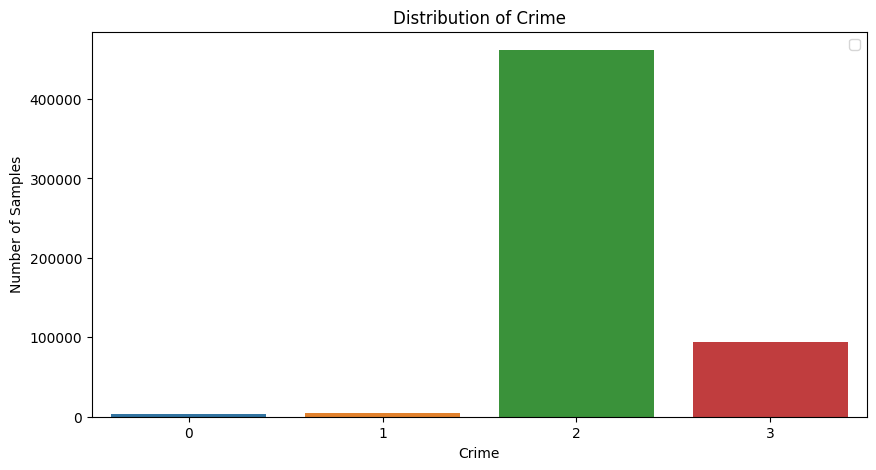

Number of samples: 
 2    461695
3     93673
1      4741
0      3054
Name: CATEGORY, dtype: int64


In [ ]:
import seaborn as sns

# Plotting the class distribution
plt.figure(figsize = (10, 5))
sns.countplot(x = 'CATEGORY', data = df)
plt.title('Distribution of Crime')
plt.xlabel('Crime')
plt.ylabel('Number of Samples')
plt.legend()
plt.show()

# Counting the number of samples for each species
counts = df['CATEGORY'].value_counts()

# Display the exact counts
print(f"Number of samples: \n {counts}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


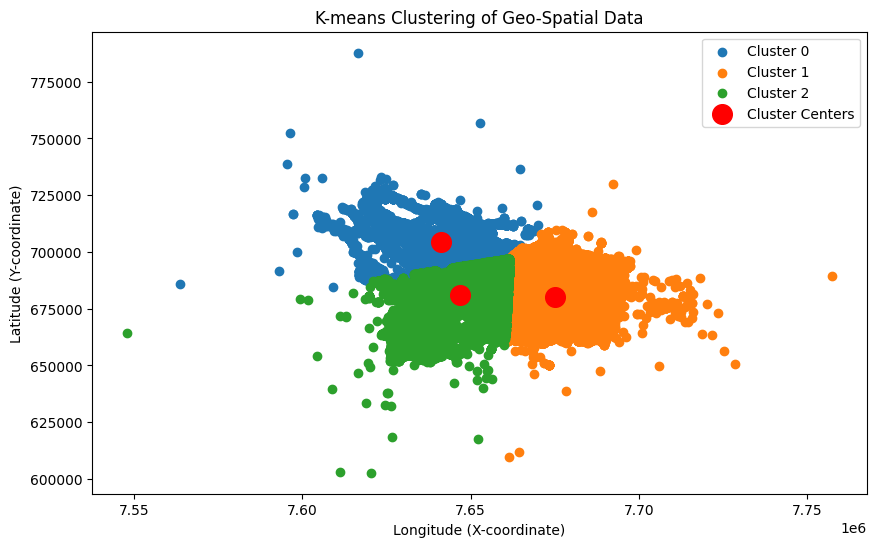

In [ ]:
from sklearn.cluster import KMeans

# Assuming 'x_coordinate' and 'y_coordinate' are the features for clustering
features = df[['x_coordinate', 'y_coordinate']]

# Specify the number of clusters (you can adjust this based on your analysis)
num_clusters = 3

# Fit K-means clustering model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Target'] = kmeans.fit_predict(features)

# Visualize the clusters
plt.figure(figsize=(10, 6))
for cluster_id in range(num_clusters):
    cluster_data = df[df['Target'] == cluster_id]
    plt.scatter(cluster_data['x_coordinate'], cluster_data['y_coordinate'], label=f'Cluster {cluster_id}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='o', label='Cluster Centers')
plt.title('K-means Clustering of Geo-Spatial Data')
plt.xlabel('Longitude (X-coordinate)')
plt.ylabel('Latitude (Y-coordinate)')
plt.legend()
plt.show()